所选数据集为：Wine Reviews——葡萄酒评论，数据集地址为：https://www.kaggle.com/zynicide/wine-reviews；

数据说明：
数据winemag-data_first150k.csv中，每条记录由11个变量组成，其中5个是标称属性，分别为：country、designation、province、variety和winery ；2个是数值属性，分别为points和price；

对标称属性每个取值变量的频数进行计算，对数值属性进行五数概括（min, Q1, median, Q3, max），并计算缺失值的数目，所得结果如下：

In [1]:
# -*- coding: utf-8 -*-

import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('../')
import csv
import math
import numpy as np
np.set_printoptions(threshold=np.inf)
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats

# 计算分位数
def my_quantile(data, p):
    pos = (len(data) + 1)*p
    #pos = 1 + (len(data)-1)*p
    pos_integer = int(math.modf(pos)[1])
    pos_decimal = pos - pos_integer
    Q = data[pos_integer - 1] + (data[pos_integer] - data[pos_integer - 1])*pos_decimal
    return Q


In [2]:
filename = '/Users/yumingfei/Documents/Document/Postgraduate/课件/数据挖掘/数据集/wine-reviews/winemag-data_first150k.csv'
header = True
print('[data] read', filename)

# 标称属性
country = dict()
designation = dict()
province = dict()
variety = dict()
winery = dict()
# 数值属性
points = list()
price = list()
missing_points = 0
missing_price = 0

with open(filename, 'r') as fin:
    reader = csv.reader(fin)
    rownum = 0

    # 每一行数据
    for line in reader:
        if header and rownum == 0:
            header = line
            print('header: ', header)
        else:
            # 标称属性
            c = line[1]
            d = line[3]
            p = line[6]
            v = line[9]
            w = line[10]
            # 数值属性
            po = line[4]
            pr = line[5]

            if c in country.keys():
                country[c] += 1
            else:
                country[c] = 1

            if d in designation.keys():
                designation[d] += 1
            else:
                designation[d] = 1

            if p in province.keys():
                province[p] += 1
            else:
                province[p] = 1

            if v in variety.keys():
                variety[v] += 1
            else:
                variety[v] = 1

            if w in winery.keys():
                winery[w] += 1
            else:
                winery[w] = 1

            if not po:
                missing_points += 1
            else:
                points.append(float(po))

            if not pr:
                missing_price += 1
            else:
                price.append(float(pr))

        rownum += 1
        # if rownum == 5:
        #     break

# 标称属性的频率

print('========================== country ==========================')
for key in country.keys():
    print(key, ':', country[key])
print('========================== designation ==========================')
for key in designation.keys():
    print(key, ':', designation[key])
print('========================== province ==========================')
for key in province.keys():
    print(key, ':', province[key])
print('========================== variety ==========================')
for key in variety.keys():
    print(key, ':', variety[key])
print('========================== winery ==========================')
for key in winery.keys():
    print(key, ':', winery[key])


[data] read /Users/yumingfei/Documents/Document/Postgraduate/课件/数据挖掘/数据集/wine-reviews/winemag-data_first150k.csv
header:  ['', 'country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'variety', 'winery']
========================== country ==========================
US : 62397
Spain : 8268
France : 21098
Italy : 23478
New Zealand : 3320
Bulgaria : 77
Argentina : 5631
Australia : 4957
Portugal : 5322
Israel : 630
South Africa : 2258
Greece : 884
Chile : 5816
Morocco : 12
Romania : 139
Germany : 2452
Canada : 196
Moldova : 71
Hungary : 231
Austria : 3057
Croatia : 89
Slovenia : 94
 : 5
India : 8
Turkey : 52
Macedonia : 16
Lebanon : 37
Serbia : 14
Uruguay : 92
Switzerland : 4
Albania : 2
Bosnia and Herzegovina : 4
Brazil : 25
Cyprus : 31
Lithuania : 8
Japan : 2
China : 3
South Korea : 4
Ukraine : 5
England : 9
Mexico : 63
Georgia : 43
Montenegro : 2
Luxembourg : 9
Slovakia : 3
Czech Republic : 6
Egypt : 3
Tunisia : 2
US-France : 1
===================

Domaine des Santonilles : 1
Blanc de Noirs Brut Reserva : 2
Made with Organic Grapes : 16
Fosilni Breg Reserve : 1
Olinto : 1
Black Betty : 1
Ascent : 18
Koos-Koos-Kia : 3
Rancher's : 1
Les Bernadats : 1
Yanez : 1
Perenzo : 1
Vigna Manapetra : 5
Château de Grézels Prestige : 2
Michael's Cuvée : 2
Petit Castel : 4
Bernkasteler alte Badstube am Doctorberg Spätlese : 11
Wachenheim Trocken : 2
En Travertin : 3
Alambre : 2
Sorano : 10
Bergeisa : 6
Pallaretta : 2
Studert Prüm Maximinhof Wehlener Sonnenuhr Kabinett : 4
Marenca : 4
Gattera : 7
Rebotarro Vineyard Old Vine : 4
Verah : 6
Viña Temprana Old Vines : 1
Handal-Denier Vineyard : 2
Dona Helena Colheita : 4
Private Collection Malbec Brut Rosé : 1
Três Castas : 1
de Sommos : 1
Garnacha-Tempranillo-Cabernet Sauvignon-Syrah : 1
La Jolla Del Norte Vineyard Block Two : 1
Paisaje de Barrancas : 2
Madonna delle Grazie : 3
The Factor : 6
Coastlands Vineyard : 11
Montosoli : 7
The Rancher : 1
McKinley Springs Vineyard : 12
Old West Block : 1
3 Ho

Gugelberg : 1
Treehouse Estate : 2
Terroir Los Miradores : 1
Bismark Vineyard : 1
Dama de Toro Reserva : 1
I Frati : 2
Fortieth Anniversary Vintage : 2
Rockin' One : 8
Federico Paternina : 1
Terroir Series Corte Malbec-Cabernet-Petit Verdot : 1
Tempranillo-Garnacha-Syrah : 2
No 2 et No 5 de Francarney : 1
1935 : 1
Sor Ugo : 1
Fordbidden : 1
Four Mile Creek : 6
Fino : 5
Estate Vineyard Old Vines : 2
Estate Sangiovese Wildridge Vineyard Biodynamic Wine : 2
Brut Metodo Classico : 1
Blanc 32 : 1
Tarima : 3
Vin Gourmand : 1
Noir 46 : 3
Inferno Riserva : 2
Thomas Schmitt Private Collection Estate Bottled Spätlese : 3
Reserva Estate Bottled : 7
Barrel Series Reserva : 1
The Butler : 3
On l'appelle : 2
Domaine Mouréou : 2
Capannino : 2
Romeira Colheita Seleccionada : 4
Arcibaldo : 4
L'Allégresse : 4
Sonoma Estates : 2
Crasto Branco : 2
Maple Vineyard : 4
Kastelaz : 8
Brauneberger Kabinett : 1
Convento do Tomar Reserva : 1
Guadalupe Selection Branco : 5
Plötzner : 1
Hofstatt : 2
Fabrizio Bianch

Pergolas Old Vines Crianza : 1
La Croix des Vignes : 2
Nutaru Rosé Metodo Classico : 2
Promemoria : 2
Pinot Noir Brut Rosé : 1
Limited Reserve Barrel Aged : 1
Wickersham Ranch Estate : 2
Casone : 1
Misceo Red : 3
Catie's Corner : 5
San Giovanni : 8
Rosé Royal Brut : 2
Wulff Vineyards : 8
Vignes du Domaine : 2
Five Blocks Wren and Temperance Hill : 4
Bradley Vineyard : 4
Bilancio : 6
Gravel Road : 4
Croere : 11
Herrenweg de Turckheim : 2
The Patriarch Premium Red Wine : 2
Les Galets Single Vineyard : 2
Seppi Landmann Zinnkoepflé Grand Cru : 2
Rotenberg Wintzenheim : 1
Steinert Grand Cru : 6
Kiedrich Gräfenberg Spätlese : 2
Legend : 2
Contrada G : 1
Lorna Marie : 2
Rapariga da Quinta Reserva : 7
Transitus : 1
Nazarenas Vineyard : 2
Winderlea Vineyard : 6
Vista Verde Vineyard : 15
Berncasteler Doctor GG : 1
Gran Enemigo : 1
Grünlock Spätlese : 1
Brauneberger Juffer Auslese : 7
Timber Crest Vineyard : 5
Kechribari : 2
Calderara Sottana Bianco : 1
Erse Bianco : 1
L'Autre : 7
Aliwen Reserva 

Vale das Donas : 3
Alma Tobía Fermentado en Barrica : 1
Paraje de Dueva Baja : 1
Clos du Roy Vieilles Vignes : 1
Domaine Chataigneraie Laborier La Roche : 1
Entrapment : 2
Endless Crush Rosé of : 2
San Nicolò : 1
Domaine Lois Louise : 1
Mont de Milieu Premier Cru : 16
The Sorceress Upland Vineyard : 1
Cuvée Los Gatos : 1
Contrada Marotta : 1
Montevetrano : 5
Domaine Grand Romane Cuvée Prestige : 1
Les Grèves Premier Cru : 6
L'Arzelle : 2
Les Archevêques : 4
Les Chevrières : 1
Dutton Ranch Emerald Ridge Vineyard : 1
Dutton Ranch Shop Block : 4
Atio : 4
Epsilon : 1
Reserve Late Harvest : 5
Crucillón : 1
Predicat : 1
L'Alcalatén : 1
Grace House : 1
Val de Oron : 1
Petit Gris : 1
Brut Etoile : 3
Artazuri : 3
Moscato : 2
Hoya de Cadenas Organic : 1
Le Beaux Jours : 1
The Chairman Series : 3
Password : 1
Preston Vineyard : 8
Dolmo Roble : 1
Monterè Ca' de' Rocchi : 2
Extravaganza : 2
Reserva Etiqueta Blanca : 2
Malma Finca la Papay : 3
Rivertondo Tenuta Valleselle : 2
Wackman Ranch : 3
Cashm

Beret Blanc : 2
Colle di Montecchia di Crosara : 2
White Orchid Reserve : 2
Block M Estate : 2
Wayfarer Vineyard Estate Grown : 2
Aux Murgers Premier Cru : 3
Cuvée Colette : 2
Vivio Vineyard : 4
Clos des Couchereaux Premier Cru : 2
Les Estournelles Saint-Jacques Premier Cru : 2
Clos Mathis : 2
Grande Vineyard : 2
Will's Cabin Vineyard : 2
Paige's Ridge Estate Grown : 3
Aux Échanges Premier Cru : 3
Tondre Grapefield : 13
Whistler Vineyard : 2
Edelgrund : 8
Horseshoe Bend Vineyard : 9
Element 119 : 1
Panzano Gran Selezione : 1
The Roost Blue Heron Vineyard : 2
Endless Crush OGV Estate Rosé of : 1
Ried Klaus Federspiel : 2
Bien Nacido Vineyard Block II Mount Eden Clone : 1
The Archimage : 2
Zieregg : 4
Seddon : 1
Cote Blonde : 1
SLH : 11
Night Owl : 4
Fraîcheur Gourmande : 1
Les Trois Terroirs : 1
Saint Gregoire : 1
Miamup : 2
The Hermit Crab : 4
Cedro Riserva : 2
Pagliareto : 1
Varco 84 : 1
Varvàra : 4
Cepas Viejas : 1
Carl's Estate : 1
Vin Rustique : 1
Laudum Barrica Especial : 1
La Cap

Selve di Luoti : 3
Vom Schloss : 11
Cadus : 3
Grüner Veltliner 8000 : 3
Cecubo : 4
Flvminis : 3
Maxwell Vineyard : 5
Opalo : 8
Cellar Select : 15
Domaine Grosset Cairanne : 3
T : 9
Vat 351 : 1
Rotschiefer Trocken : 3
Offspring : 3
Piersporter : 1
Possnitzberg Reserve : 1
Hinter Der Burg Federspiel : 2
Fumberg : 1
Brauneberger Juffer-Sonnenuhr Spätlese : 8
Andreen-Gale Cuvee : 1
Strassertal : 1
Yellow Label : 19
Row 42 : 1
Erbacher Steinmorgen Kabinett : 1
Early Release : 4
Brut Sélection : 3
Blanc de Blancs Brut : 66
Valley Oaks : 34
(Southern Highlands) GI : 2
Watervale : 16
Regional Collection : 11
Grand Archer : 3
Clone 6 : 5
ATS : 2
Underground Series Unwooded : 2
Epilegmenos Reserve : 4
Agiorgitiko by Gaia : 5
Samena Golden : 2
Amethystos : 18
Collection White Dry Table Wine : 2
Mavrodaphne of Patras Reserve : 2
Canava : 2
Magic Mountain Red : 2
Halkidiki Vineyards : 2
Gravelstone : 6
Domaine Matsa : 2
Classico : 13
Oenodea : 4
Atlantis : 8
Metoxi Reserve : 2
St. George : 3
St. He

Reserve Old Vine : 5
Tempranillo-Shiraz : 1
Chenin No. 5 : 1
Grotta Rossa : 5
Costamolino : 5
Vorgeschmack : 1
Xipella : 2
Chenin Blanc-Pinotage : 1
Psi Clone : 1
Wahoo White : 1
Pfarrhof : 1
Capa Rota : 2
Estandon : 3
Corona Majore : 5
Zinfinity : 1
Stemmari : 33
Jurassic Park : 3
Taureau Y3 : 3
Cuvée Marine : 5
Monte Alto : 8
First Class : 6
Alticelli : 4
Reservado : 22
Heart : 3
Nullius : 3
Aternum : 5
Regaleali : 13
The Short Story Collection - The Owl Post : 3
Sella : 3
La Puerta Alta : 3
Vintage Selection Shiraz-Mourvèdre-Viognier : 3
9 meses en barrica : 2
Libertad Vineyard : 2
Noble House QbA : 2
Vintners Reserve Celestial : 2
Santa Isabel : 12
Clara Benegas : 5
Wild Grape Dry : 2
Man Quixot : 2
Castle Wild Grape Dry : 2
The Bishop of Riesling : 2
Melius : 2
Brut Cuvée Chardonnay-Pinot Noir : 2
Fransola : 5
Plan de Dieu : 3
Parr Vineyard : 1
Bush Camp The Sundowner : 1
Zvy-Gelt : 1
Handverlesen : 1
Massís del Garraf : 2
Braida Santa Cecilia : 1
Hi Vista Vineyard : 4
Monte Ceria

Le Chiuse : 1
Beato Riserva : 3
Piedi Grandi : 1
Campogiovanni Il Quercione Riserva : 1
Le Lucére : 1
Kyndall's Reserve : 2
Turnabout's : 3
Kangarilla : 3
Bramante Cosimi : 1
Qu'es Aquo : 1
Monte dall'Ora : 1
Jackson Estates Grown Vintner's Reserve : 1
Guarda Rios : 1
Iperico : 2
White Wine Made With Organic Grapes : 1
Paraje de El Santo : 1
Pont du Rhône : 2
Tempranillo, Garnacha, Mazuelo : 1
Otoñal : 1
Henrietta : 4
Franci Riserva : 1
Vigna Soccorso : 4
Ballard Canyon Estate Reserve : 1
Acciaiolo : 6
Campo di Marzo : 2
Vigna delle Raunate : 6
Elysium : 6
Voliero : 4
Opera Prima : 12
Fuente Milano : 5
Eagle's Select Red Wine : 1
redFOUR : 1
Madden Ranch : 10
Lot 807 Reserve : 1
Vigne Nuove : 2
Carolinius : 1
Saseti : 2
Conde d'Ervideira Reserva : 1
Poggio al Vento : 1
Barberis Family Reserve : 1
Miamba : 7
Pian di Conte Riserva : 1
Lemartine : 1
Le Cacce in Villa : 1
Borderline : 2
Campo Santa Lena : 3
Tinto da Talha : 2
Il Valpolicella : 2
Vivanco Viura-Malvasía : 1
Fontana del Fongo

Red Heaven : 1
Red Label : 11
L'Entente Red : 1
Gaston-Reserve : 1
Tinto Cuvee Mosteiro : 1
Manzanilla Riá Pitá : 2
Viña Albina Reserva : 1
Chevalier de Minière : 4
Le Chemin des Loges Demi-Sec : 4
Te Muna Aroha : 4
Selección 12 Crianza : 4
Premium Rosé Brut : 4
Black-Sears Vineyard : 5
Château de Gueyze : 4
Marylhurst Estate : 5
Marqués de Rodil Especial Palo Cortado : 4
Ruith Hora : 4
DFJ Caladoc/Alicante Bouschet : 4
Moulin des Dames : 8
Targa Riserva 1840 : 1
Grammonte : 2
Kaitlin Rayann White : 1
Chiaramonte : 2
Sangio Vetta : 2
Almerita Brut : 1
Erse : 2
Termes : 9
Serrado Branco : 4
Albatro : 7
Zizzolo : 5
My Father's Vineyard Shula's Pond : 4
Sangiacomo Old Lakeville Road Vineyard : 4
The Slammer : 6
Monte do Carrapatelo : 4
Emotion Occitane : 4
Vittorio's Vineyard : 9
Sant'Adele : 7
Poggio Verrano 3 : 6
Guadalupe Branco : 6
Grou Grey : 4
Altrovino : 12
Falcon Vineyard : 1
Chemin de Fer : 1
Elephant Mountain Vineyard : 5
The Merle Reserve : 4
'A Naca Rosso : 1
Entre II Santos :

Vendimia Seleccionada San Nicolás De Tolentino : 1
Fonte alla Selva : 1
Clemente VII Riserva : 3
Castelgreve : 1
Jayson : 1
Elegia Riserva : 1
Uvaggio : 1
Finisterre : 7
Percristina : 1
The Bamboo Scrub Single Vineyard : 1
Little Venice Single Vineyard : 1
The Shipster's Rapture Single Vineyard : 1
Tyche's Mustard Single Vineyard : 1
G.A.M. : 5
Thompson Vineyard Reserve : 1
Le Grand Bouqueteau Réserve : 1
Les Illustres Sur Lie : 1
Estate Bottled Unoaked : 3
Satyricon : 1
Vetiver Vendimia : 1
Cesco dell'Ermo : 1
Redhead : 2
Solitude : 3
Vigna Camarato Riserva : 1
Kyklos : 2
Firepeak Estate : 2
South Ridge Cuvée Merret Brut : 1
Chamise : 1
1870 : 1
Fontalloro : 4
Beckstoffer G III : 1
Rocca : 1
Vista Verde Vineyard Late Harvest : 6
Stoney Vine Vineyard : 1
Ginestra Casa Maté : 1
Lazzarito Riserva : 1
Cuvée Etienne Henri : 1
HJW Vineyard : 1
Querencia Brut : 1
Sisquoc : 1
15 Reserva : 1
Meleto : 1
Big : 1
Chaleur Estate : 7
Cuvée Céleste Brut : 1
La Forcadière : 1
Gelso : 1
The Party Star

Sadie : 1
Audace Brut Rosé : 1
San Lucas Unoaked Pure : 1
Alcanta : 1
Château Campot Lafont : 2
Ro-Sae : 1
Cuvée Céleste Extra Brut : 1
Agnvs de Autor : 1
Perles Rosé : 1
Briccole : 1
Napoleon : 1
GRV : 2
Tavernello : 1
Raja Cuvée : 1
Vino Spumante Rosé : 1
Swallowtail : 1
Reserva Limited Edition : 1
Beau Melange : 1
Felix : 1
Picol Ross Brut : 1
Impetu : 1
Reserve Lot 13 Tecklenberg Ranch : 1
Mina Velha : 1
Seven Daughters : 1
Great : 1
Treo Winemaker's Blend : 1
Les Goudelettes : 1
Pierre McKinley Springs Vineyard : 1
Gricos : 5
Cratere Rosso : 1
Cuvée du Soleil : 2
Vagabond : 2
Gerbino Bianco : 1
Côte de Grisey : 1
La Roche : 1
Calanica Frappato & Syrah : 1
Cinghiale Vineyard : 6
Meditazione : 2
Cardinals' Peak : 5
Sharilee : 2
Golden Terraces Vineyard : 2
Omaka Reserve : 9
Larner Vineyard Clone 3 Reserve : 2
Les Cent Vignes Premier Cru : 2
Stone Tree SoRhô : 4
Vigneto Poggio Sant'Enrico : 2
Blessings : 1
Soliloquy Vineyard : 4
Jackson James : 1
Le Poesie : 1
Workingman's Red : 1
Pi

Cigalus : 4
Quinta do Mondego : 1
Principal Grande Reserva : 1
Three Bees : 1
Fuchslahn : 1
Signature Selection Garey Vineyard : 1
Anna's Vineyard : 6
Parcelas : 2
Charnay Vieilles Vignes : 2
The Money Spider : 3
Signature Series San Lucas Vineyard : 2
Loire Valley : 6
Roadside Market Red : 2
Proprietor's Limited Release : 6
Lieu Dit Malakoff : 2
Pomar Junction Vineyard : 3
Doulce France : 2
Alta Chardonnay-Torrontes : 2
La Pompadour : 1
Dalton Cuvee : 1
Gran Reserva Brut : 1
Big River Ranch : 11
Bellezza : 7
AfterThought : 1
Petruccino : 1
C'est Syrah Belle : 6
Château d'Aussières : 4
Dead Letter Office : 1
The Beauty : 2
Elegance : 12
Donna di Valiano : 6
Fonte delle Donne : 4
The Chosen Diamond : 1
Ferruggini : 2
Gilgal Brut : 1
Testa Vineyard Old Vine : 2
Mor : 1
Mezzodì : 1
Version The Glenrose Vineyard : 5
Pelos Sandberg : 2
Sandra Adele : 2
Campo alla Cerqua : 3
Chamán Reserva : 5
Russo Red : 2
Bella E Rosa : 2
Grand Réserve : 2
Papa's Knoll Estate : 2
Viña Cristina y Bibiana Co

Jackknife Corner : 3
The Lineup GSM : 3
DON : 3
Manuel Quintano Reserva : 3
Belnero : 2
Rancho Santa Rosa Vineyard : 6
Senhora da Ribeira Vintage : 2
Isoceles : 2
Riserva Pian di Staffa : 2
Chocapalha Reserva Branco : 2
Les Ivrettes Vineyard : 3
Blend #4 : 2
Domillor Harvest Selection : 2
Cabernet Sauvignon : 21
Colleja : 2
The Drunken Goose : 1
Jesperson Ranch : 1
Artefact : 1
The Palindrome : 1
Driopi Agiorgitiko : 1
Aamackhnoc : 1
Nuestro : 3
Anniversario Dry : 3
Villa Luigia Extra Dry Millesimato : 3
Oris Cuvée Dry : 5
Zeta Dry : 8
Costa d'Oro Brut : 5
Vigneto Dirupo Extra Dry : 5
Red Bucket : 3
Arte : 3
Langenlois Terrassen : 3
De Wet : 1
Marimar Estate Vineyard : 3
Hohenleiten : 1
La Court : 8
Ramal Vineyard Estate Vineyeard Series : 1
Farráh : 1
Purisima Mountain : 4
Cosecha Nocturna : 4
Alta Corte : 5
Rive di Farra di Soligo Extra Dry : 2
Stellwagen Vineyard : 5
Paso de Piedra : 7
Kali Hart Estate Grown : 2
Ockfener Bockstein Erste Lage Spätlese : 1
Sämling 88 Classic : 1
Nussb

Cister da Ribeira Branco : 5
Rosso di Napa : 4
Ellie's Old Vine : 1
Les Enfants Terribles : 1
Will's Hill Vineyard : 1
Le Balze : 3
Sydney : 1
Giuli : 3
Cuvée B : 3
Litina : 3
Whalebone Vineyard : 3
Costa di Bussia Campo del Gatto : 3
Giorgio Tenaglia : 3
Griffin's Lair : 7
Las Mulas : 3
Vigne Vecchie : 3
Galinette : 3
Cuvée Platinum Extra Dry : 3
Zerolegno : 3
Citrus Grove : 3
Terre Astesane : 3
Pilade : 3
Caranti : 3
Rosa Blanca : 5
RoseAnne's Red : 4
La Baldea : 3
Vinchio : 3
Poizin : 4
Barile : 3
Morine Ranch : 10
Undone Dry : 3
Cosecha : 10
Il Campo Estate Field Blend : 3
Clarión : 3
Single Vineyard Reserve White : 4
Por Vida : 3
La Bohéme Artist Series : 2
Timber Crest Vineyards Winemaker's Reserve : 2
Avivim Kosher : 2
Imbricci : 2
Reserve Unoaked Kosher : 2
Reserve Petite Sirah-Zinfandel : 2
Campomaccione : 6
Il Morino : 3
Elu : 4
Firepeak Vineyard : 15
Ridge Ranch : 2
Fastaia : 1
Cavanera Rovo delle Coturnie : 1
Cusora : 1
Il Lemos : 1
Cathy's Reserve : 2
Domaine des Ailes : 1

Quinta do Retiro Novo Vintage : 2
Sonoma County Selection : 4
Thirty-Fifth Anniversary : 2
Glorieta Vineyard : 2
Blanc de Noirs Brut : 10
Sublime : 2
Luciano El Casal : 2
Glittering Throated-Emerald Unoaked : 2
The Ditch Digger : 2
Fuente Milano Verdejo-Viura : 2
Rinsol : 2
Rhone Red : 2
Bob Wine : 5
Backroads : 2
Primo Ripasso Castelliere delle Guaite : 5
Arrowhead Red Table Wine : 2
Mountain Cuvée Estate : 3
Summation : 4
Conca del Grillo : 3
Berghan Vineyard : 3
Tilly's Vineyard : 3
The Earth Series - Volume 1 : 3
Jane Hunter : 4
Quintet : 6
The Yard Pedestal Vineyard : 1
Rosé de : 3
dB Selection : 3
Quixote Merlot-Tempranillo-Petit Verdot : 1
Veigas de Padriñán : 1
Kuddia di Zè : 1
Rosé of Sangiovese : 2
Herea : 3
Cumal : 1
Magno Megonio : 1
Capellanía Reserva : 1
Colección Vivanco Parcelas de Graciano : 1
Entemari : 4
Anniversary Cuvée : 3
Clone 777 : 3
Giancòla : 3
Grans Muralles : 6
Sticky : 1
Slice of Pape : 1
Grecomusc' : 1
Matallana : 3
Josef Vineyard Late Harvest Estate Bott

Riserva Tenuta La Gabbiola : 2
Nectar de Moncontour : 2
Expression de Orthogneiss : 2
The Jem : 2
Riserva Novecento : 2
D Block Reserve : 8
Vigneto Nervo : 3
Pian Romualdo : 2
Medalla Real Single Estate : 2
Nervo Fondetta : 3
Roere : 2
Snowflake White Wine : 2
Red Mountain Vineyard : 2
Tettineive : 2
Arione dell'Ulivo Riserva : 2
Singerriedel Federspiel : 2
De Miranda : 2
Weissburgunder : 5
Vigna Vigia : 2
Valgrande : 3
Jemma : 2
Optu Red Wine : 2
Charlie's Patch : 3
Hacedor de Mundos Reserva : 9
Lapa : 4
Santigaini : 3
Anderson Ranch : 5
Defiance Vineyard Estate : 5
Columbia Valley : 3
Ph. Perdriaux Sec : 3
MCK : 3
Cuvée les Bézards : 3
Mb : 5
Unusual Cabernet-Shiraz-Zinfandel : 2
Terre di Dora : 4
Schietto Syrah : 2
En Pimont Château de Chassagne-Montrachet : 2
Small Lot Series : 8
Terroir Zephyr Ridge Vineyard : 2
The Illusionist Red : 3
La Demoiselle de Bourgeois : 4
Mas Sinén Coster : 3
Pissarres : 3
Late Harvest Reserve : 5
Alvarinho : 3
Vaca Mountain : 3
Terre Dora : 1
Lo Mon : 

Eschen Vineyard Old Vine : 2
Family Vineyard Selection Del Rio Vineyard : 2
Obsession Symphony : 2
Primitivo : 2
Cala Reale : 3
Touraine Sauvignon : 3
Marlborough Cuvée : 3
Small Berry : 3
Perdera : 4
Re Nero : 3
Trout Gulch Vineyard : 3
Village : 6
Il Bruno : 3
Vintners Old Vine Estate : 2
Cluny : 2
Évangéliste Reserve : 2
Tirage Brut : 2
Jack Hill Vineyard : 2
Solera3 : 2
Arte Italiana Brut : 3
Fermentado en Barrica de Roble : 2
Hoya De Cadenas Reserva Prevada : 2
Brut Collection Privee : 2
Cuvée Vino Spumante Brut : 2
Piancarda : 2
Terres de Noël Blanc de Blancs Grand Cru Brut : 3
Calmant Creek Vineyard : 4
Thirtieth Anniversary Vintage Selleck Vineyard : 3
Vintage Rosé Brut : 4
Comtes de Champagne Brut Rosé : 5
Brigden Vineyard : 6
Spécial Club Premier Cru Brut : 3
Le Nombre d'Or Brut : 4
Millésime Exception : 3
Cameron Vale : 2
Hanenhof : 1
Wulf Vineyard : 1
Candale d'Issan : 1
Villa Cafaggio : 1
Fête : 1
Pencarrow : 8
Daniel : 1
Clássic : 3
Quipu Blend : 2
Chaminé Branco : 2
Litt

Estrosa : 3
Open-top Vat Fermentation : 3
Chardonnay Pinot Grigio : 3
Maycacamas Mountains : 3
Red4 Huerhero : 3
Voyou Rosé : 3
Teragré Red Etude : 3
Crazy Creek Estate : 4
Becquer : 5
Late  Harvest : 3
Lot 71 Frontier Red : 3
Cuvée Amelia Reserve : 3
Monzinger Frülingsplätzchen Kabinett : 3
Violet-Crowned : 3
Blauer Zweigelt : 3
Le Sec de Juchepie : 3
Bullrush Vineyard : 3
Ol' Red : 3
Not imported : 3
Llama Farm : 3
TF : 3
Schiefer Riesling QbA Trocken : 3
Altazor : 4
Un Deux Trois : 3
Titan : 3
Gioia : 2
1141 : 2
Roberto Stucchi : 2
San Ripolo : 2
Schön Smaragd : 3
Chenowith Ranch : 3
Three Ton Oak Free : 3
Traminer Spätlese : 3
Lone Canyon Vineyard : 4
Mística : 3
Sugarloaf Mtn. Vineyard : 3
Eclipse Late Harvest : 3
Old Vine Creekside Block Bar 49 Vineyard : 3
Ronchi di Pietro : 6
Quinta do Valdoeiro Reserva : 3
Mertert Herrenberg Grand Premier Cru : 3
Bucellas Arinto : 3
Toh! : 3
odé Cabernet Sauvignon-Agiorgitiko : 3
Angostura Gran Reserva : 5
Soleil Late Harvest : 3
Syrcab : 3
El

This is Eleven : 1
Praeclarus Cuvée Brut : 1
Ramos Reserva : 3
Yellow Label Brut : 1
Baronne de Siaurac : 1
Rüdesheimer Dry Kabinett : 1
Maydie Vintage : 1
Cuvée Montesquieu : 2
Vila Santa Branco Reserva : 2
Les Chardannes : 2
Comitissa Glod Gran Riserva : 1
Dom Rafael Tinto : 1
Palmes d'Or Vintage Brut : 1
2 Worlds Reserva Tinto : 1
Vigna Martina : 1
Cuvée Léonie Brut : 1
Pianezzo : 1
Wine-Bush Vineyard 60% Steinbeck Vineyard 40% : 1
Cuvée Francis Courselle : 2
Sru : 2
NonnOrlando : 1
Haven : 1
BSH Red : 1
Saint Georges : 1
Sexy Tinto : 3
181-Merlot : 1
Magic Hour White : 1
Trei Hectare Roze : 1
Epicenter, Old Vine : 1
Perle di Piera Yellow Pearl : 1
Aphros  Super-Reserva Bruto : 1
Tramontana Brut : 1
II Reserva : 1
Château Tour de Mirambeau Réserve : 1
Piggot Range : 1
Château Rauzan-Despagne Réserve : 1
DUBL : 1
Château Latrezotte La Sauternes de Ma Fille : 1
Esprit de Beaucastel Grown & Bottled on the Estate Mourvèdre-Grenache-Syrah-Counoise : 1
Yellow Label Crianza : 1
Carte Corai

Rive di Cimarossa : 1
Gran Cuvée Satén Brut : 1
Two Acres : 1
de Coelo Quintus Vineyard : 1
Bridesmaid Red : 1
Amor Special Cuvée : 1
Assembly : 1
Pheasant Run : 3
Petit Toumilon : 1
Confluence Vineyard Estate Grown : 1
Cuvée Rothschild : 1
Three Corner : 1
Gowan Creek Vineyard Estate Grown : 1
The Ranch : 1
Kaefferkopf Clos Saint Landelin Grand Cru : 1
Testa Vineyards : 1
Bical & Arinto : 1
Villa Prandone Navicchio : 1
Broken Road : 1
Grande Riserva : 2
Gran Cuvée Pas Opere : 1
Capitel del Monte : 1
Il Mulinello Klipsun Vineyard : 1
Lapaccio : 1
Clot de Roure : 1
Proyecto Cu4tro Bubbles Brut : 1
Altitud : 2
Nina : 1
Sielo Blu : 2
Meritage Quintessential : 1
Singiani Vineyard : 1
Solyss : 1
Native Branco : 1
The Narrows Vineyard Estate Grown : 1
Le Sol : 2
Dutton Ranch Campbell Vineyard : 1
Palpite Reserva : 1
Jack & Jamie's Block : 1
Postcard From Morocco : 1
Private Stash #7 : 1
Deerstalkers : 1
Cobos Volturno Marchiori Vineyard : 1
Bonita's Hill Don Miguel Vineyard : 2
Summitville V

Poderuccio : 2
Rim Rock Red Wine : 2
Gold Reserve Single Vineyard : 2
Malentrata : 2
Cuvée Franz : 2
Wild Z Red Wine : 2
Napa Cuvee : 2
Liber I : 2
Release Number Four Red Wine : 2
La Syrah de Bouissel : 2
Crown Orchard Vineyard : 1
Absidis Semi-Seco : 1
Falko Cool Climate : 1
Luigi e Giovanna : 1
Deu la Deu : 1
Domaine Grand Veneur Blanc de : 1
Jalá : 1
Polvento Villa Monticelli : 1
20-Years Old Tawny : 1
Terres Brulées Syrah : 1
Cuvée Giselle : 1
Cabernet Blanca Rosé of Cabernet Sauvignon : 1
Lot No. 3 Field Blend : 1
Le Grand Cros Rosé : 1
Selected Harvest : 2
Bombshell Red : 1
Shaw Vineyard Reserve Century Vines : 2
Nova Vineyard Old Vine : 1
Bockenauer Felseneck Spätlese : 3
Grâfin de la Tour : 1
Cara Mia Vineyard Camerata Red Wine : 1
Anfora Breg : 1
Minick Vineyard : 3
Lot Number 6 : 2
Tendresse de Jurque : 2
Premium Estate : 2
Doga delle Clavule : 1
Il Castelluccio : 2
Le Prunee : 1
Alta Max : 1
Seta : 1
Cuvée Elodie : 1
Clemente VII Settimo : 1
Battuello Vineyard : 2
Colle all

Abadal 3.9 Reserva : 1
Doctrina Perpetua : 1
Triumviratum Riserva : 1
KW Ranch Vineyard : 1
La Grande Dame Brut : 5
Sagemoor Vineyards Reserve Red : 1
Rachael's Vineyard : 1
Femme de Champagne Brut : 1
Paris Brut : 4
Cinco Josés - 5 Joes Old Vine : 2
Souzao : 2
Abrazo del Toro : 2
Care : 2
Madiere : 2
Il Decennale : 2
Sòdole : 2
Rüdesheimer Berg Roseneck Spätlese Feinherb : 2
Himmelsrech Dirmsteiner Mandelpfad Spätlese Trocken : 2
Corner Pocket Vineyard : 2
Tenuta S. Giovanni Valdisanti : 2
Sassobucato : 2
Kammerner Lamm : 1
Coopersmith Méthode a l'Ancienne : 1
Margarete's : 1
Rosa Mystica : 2
Catena Nicasia Vineyard : 1
Triangle Block Chinook : 1
Erdener Treppchen Spätlese** : 1
Brut Réserve Grand Cru : 1
Roccamora : 1
10 Anos Collections Tawny : 1
Fusion White Wine : 1
Blocks 7 & 22 : 1
Les Hauts de Janeil : 1
Château Malavieille Alliance : 1
Grande Cuvée Extra Brut : 1
Moner : 1
Quinta de Roriz Prazo de Roriz : 1
Old Hill Ranch Vineyard : 1
Brut Val d'Oca : 1
Antão Vaz-Arinto : 1
Ex

Serego Alighieri Poderi del Bello Ovile : 2
Grande Réserve Pinot Noir : 2
Sovente : 2
Laguna del Inca : 2
47.5° : 2
Jonquil Vineyards : 2
Sauvion du Cléray : 2
Giant Steps Vineyard Bernard Clones 95 & 96 : 2
3 Months in Oak : 2
Dionis : 2
Kretikos : 3
Val de la Mer : 2
Purple Earth : 2
Vertus Reserva : 2
Geremia : 2
Triple Black Slopes : 2
Jerusalem Hill Vineyard : 2
Poggio Al Lupo : 2
Trittenheimer Apotheke Auslese* : 2
Enkircher Batterieberg Spätlese : 2
Lot 48 Meritage : 2
Nell : 2
Les Ombelles : 2
Château de la Bigotière : 2
Sélection Chardonnay Sauvignon : 2
Lot 43 : 2
Maresh Vineyard Loie's Block : 3
Cuvée Tête de Murger : 2
James Berry Vineyard Bone Rock : 2
Viña Victorio Coletto : 2
Blue Top Premier Cru : 2
Varietal Collection : 2
Cerviolo Bianco : 2
Malmantico : 2
Picnic : 2
La Belle Masure : 2
Low Man Red : 2
Mrachek Vineyards Wahluke : 2
Bella Marsilia : 2
Marteto : 2
Grande Réserve Chardonnay : 2
Les Lys Demi-Sec : 2
Grands Poisots Premier Cru : 2
Grandes Ruchottes Premier 

Bianco di Passomaggio : 2
Kabinett Halbtrocken : 1
Oak Lane Chenin Blanc-Sauvignon Blanc : 1
Kalkstein Dry QbA : 1
San vincente Vineyard : 1
Pinot Grigio Grecanico : 1
Feliz #62 Zinfandel : 1
Baglio Badami Vioca : 1
Tenute Dorrasita : 1
Moonambel : 1
Kremser Goldberg : 1
L'Autentica : 1
Le Torri : 1
Nussern : 1
Zeisneck : 1
Blue Rock : 1
Colle Del Re : 1
Zipolo : 1
Donello : 1
Bricco Rovella : 1
Pavanne : 1
Conte delle Vipera : 1
Paso Hondo Reserva : 1
Peck Ranch Vineyard Reserve : 1
L'Ermita : 1
Cardenal Cisneros Reservas : 1
Finca Dofí : 1
Rutherford Hillside Reserve : 2
Nemesis : 1
60/40 Barrel Select : 2
Emma's Vineyard Unwooded : 1
Destiny Ridge Vineyard Shepard's Mark White : 1
Volo di Farfalle : 1
Winemaker's Collection Late Harvest : 1
Beau Terre Vineyard : 1
Estate Robert's Blend : 1
Brut Heredad Reserva : 1
Cuvée Tenuta Val de Brun : 1
Tapteil Vineyard Red Wine : 1
Lagosta : 1
Butterdragon Hill : 1
Nikela : 1
Reserve El Delirio Syrah-Malbec : 1
Don Pasquale : 1
Jannin Trocken

Naoussa : 41
Thraki : 3
Constantia : 35
China : 3
Jiri Valley : 4
Cape Agulhas : 4
Massachusetts : 10
Arcadia : 5
New Jersey : 24
Pageon : 4
Northwestern Italy : 10
Puente Alto : 22
Klein River : 4
Buin : 6
Mavrodaphne of Patras : 12
Ilias : 7
Távora-Varosa : 5
Requinoa : 10
Colares : 1
Peljesac : 13
Elazığ : 3
Sebes : 3
Ukraine : 5
Vinho da Mesa : 3
Wairau Valley : 16
Terras do Sado : 25
Israel : 13
Michigan : 25
Texas : 41
England : 9
Valle de Guadalupe : 56
Tokaj : 29
Imathia : 2
Malleco : 3
Kakheti : 29
Brda : 17
Waiheke Island : 13
Waipara Valley : 26
Amyndeon : 8
Sterea Ellada : 1
Transmontanas : 2
Dingač : 2
Vinho Espumante : 2
Croatia : 2
Lemnos : 1
Krk : 2
Terras da Beira : 2
Valle de Guadalupe and Santo Tomás : 3
Wairarapa : 25
Georgia : 12
Rapel Valley-Casablanca Valley : 6
Lake Skadar Valley : 2
Middle and South Dalmatia : 3
Steiermark : 7
Goumenissa : 4
Estremadura : 98
Obidos : 6
Washington-Oregon : 3
Vinho Licoroso : 2
Mátra : 4
Achaia : 2
Cyclades : 2
Trás-os-Montes : 8

Sequoia Grove : 56
VinRoc : 9
Ferguson Crest : 3
Cave Spring : 23
Sanguis : 41
Ram's Gate : 16
Luis Pato : 12
Array : 4
Vie Winery : 17
Woodward Canyon : 61
Domaine Loew : 3
Hugel : 45
Lafond : 46
Lynmar : 114
Royal Tokaji : 40
Ressia : 5
Rock Wall : 54
Piazzo Armando : 17
Château Marsau : 2
Jean Becker : 12
Byron : 72
Caliterra : 75
Fort Ross : 29
Easton : 87
Kirsten : 3
Labouré-Roi : 76
MacMurray Ranch : 27
Max Ferd. Richter : 10
McCay Cellars : 19
Chanson Père et Fils : 101
Domaine Barmès-Buecher : 29
Domaine Collotte : 5
Domaine Rieflé-Landmann : 11
Domaine Weinbach : 20
Elizabeth Chambers : 7
Ordaz Family Wines : 1
Santo Wines : 3
Soléna : 59
Stags' Leap Winery : 26
Terre di Giurfo : 20
Bodegas Muriel : 14
Burgo Viejo : 9
Chacewater : 23
Frank Family : 49
Ancien : 5
Barden : 6
Château de Gayon : 4
Demetria : 41
Cherry Pie : 2
Johanneshof Reinisch : 55
21 Grams : 1
Aperture : 4
Babcock : 82
Lleiroso : 2
Meinklang : 3
Muhr-Van der Niepoort : 7
Nicora : 3
Rusack : 70
Schwarz Wein : 6

Disznókö : 17
Cave de Kientzheim-Kaysersberg : 6
Bacalhôa Wines of Portugal : 75
Big Basin : 27
Geh. Rat Dr. von Bassermann-Jordan : 22
Inizi : 1
Kössler : 9
Loron et Fils : 5
Luis Duarte : 30
Peter Nicolay : 27
Heinz Eifel : 8
Rocky Hill : 2
St. Pauls : 25
Tiefenbrunner : 25
Nittnaus Anita und Hans : 45
Villa Matilde : 46
Vetus : 1
Greywacke : 10
Taplin Cellars : 1
Decibel : 1
Frostwatch : 17
Kivelstadt Cellars : 1
Rexford : 13
Santa Barbara Winery : 65
Stadt Krems : 18
Bodegas Fariña : 44
Trump : 13
Pangloss Cellars : 5
Parusso : 15
Prior Art : 1
Stinson : 8
Milijan Jelić : 1
Casa de la Viña : 1
Duorum : 19
Estate 1856 : 6
Josh Cellars : 6
Burmester : 29
Château du Coudray Montpensier : 1
Château Haut Prieur : 1
Château Moncontour : 46
Veramar : 37
Renato Ratti : 28
Schröder & Schÿler : 4
:Nota Bene : 49
Paradisone : 3
Poggio Verrano : 21
Valmiñor : 12
Wagner : 71
Dauvergne & Ranvier : 6
Philippe Viallet : 5
Ballentine : 66
Budimir : 11
Atalon : 14
City Winery of New York : 9
Elio Gr

Torlasco : 3
Diego Conterno : 2
Grand Bourgeau : 1
Château Pierrail : 2
Chavet Fils : 2
Conway : 2
Adega Cooperativa Ponte de Barca : 14
Alamos : 38
Canyon Wind : 6
Eagle Eye : 8
Jed Wines : 1
Maison Malet Roquefort : 2
Château la Baronnerie : 2
Batič : 6
Château Maubert : 1
Boomtown : 31
Domaine Eden : 4
The Divining Rod : 2
DFJ Vinhos : 258
Four Fields : 2
Helfrich : 24
Borgognot : 1
Château de Belcier : 12
Brancaia : 13
Caiarossa : 10
Covila : 5
Elios : 4
Martín Berdugo : 9
Constantin Gofas : 1
Viña Casas Patronales : 30
Johannes Kunz : 1
Love Noir : 1
Meiomi : 2
Millaman : 7
Quercia al Poggio : 2
Reata : 5
Ventana : 44
Zero One Vintners : 9
Finca las Caraballas : 1
Château Le Bourdieu : 2
Cycles Gladiator : 20
Stony Lonesome : 6
The Hunt : 1
Cascada Peak : 1
Eterna Juventud : 1
Château Bournac : 1
Grandes Vinos y Viñedos : 13
Avelina : 3
Roquesán : 1
Solis : 1
Château Fleur la Mothe : 3
Juan Gil : 12
Lágrimas de Maria : 4
Château Vieux Peyrouquet : 1
Wild Thing : 1
Winzer Krems : 8

Fattoria di Montecchio : 4
Château Crusquet de Lagarcie : 4
Château Philippe-le-Hardi : 23
Domaine de Beaupré : 1
Gino Fasoli : 12
Kettmeir : 2
Sansonina : 8
The Federalist : 6
Carbone : 1
O-Neh-Da : 1
Pasini San Giovanni : 3
Peregrine : 14
Montoya : 4
Old Soul : 2
Bricco Mondalino : 2
Chapter Capítulo 8 : 2
H. Abrantes Douro Wines : 6
Resalte : 15
Stone Tower : 1
Losi Querciavalle : 1
Château de Francs : 1
Castello di Bolgheri : 14
Château Tour de Pez : 7
DeTierra Vineyards : 2
Maxville : 1
Lujon : 8
MacRostie : 42
Domaine Mersiol : 6
Château la France : 3
Edmeades : 15
Le Petit Cochonnet : 1
Les Rocailles : 1
Melée : 2
Vermeil : 9
Jacob's Creek : 82
Cucao : 1
Domaine Barcelo : 1
Baron Philippe de Rothschild : 36
Sutro : 1
Tortoise Creek : 23
Mureda : 1
Doña Isadora : 1
En Fuego : 1
Heartache : 3
Ignacio Marín : 8
Mill Creek : 23
Dancing Coyote : 1
Aresti : 66
Cellier des Chartreux : 3
Underwood : 7
Reuling Vineyard : 2
Wait Cellars : 3
William James : 2
Clos de la Tech : 5
Montecastr

LaZarre : 1
Cantina Cortaccia : 3
Glen Carlou : 26
Stark-Condé : 18
Stuhlmuller Vineyards : 19
Spice Route : 22
Martino : 7
Bixio : 6
Brampton : 27
L'Antica Quercia : 17
Toffoli : 23
Tyee : 7
Sierra Vista : 15
Rutz : 16
Château Maupague : 10
Filippi : 10
Finca Decero : 21
Domìni Veneti : 39
Eikendal : 8
Herdade da Comporta : 34
Prager : 45
Stefano Accordini : 28
Toccata : 2
un4seen : 3
Vaona : 16
Ravines : 32
Rheinkilometer 501 : 2
Monte del Frá : 39
Pellegrini Vineyards : 23
Allegrini : 29
Bertani : 47
Canard-Duchêne : 8
Tenuta Buon Tempo : 1
Bodegas Olarra : 12
Simple Life : 1
Salcis : 1
Canonica a Cerreto : 6
Thomas Goss : 1
Brazin : 15
Miguel Torres : 95
Pala : 73
Château Tour Prignac : 3
Château du Chatelard : 13
Fiddletown Cellars : 11
Huntington : 21
Kandarian : 5
Hawkstone : 19
Six Prong : 10
Roza Ridge : 15
Atalaya : 7
Cantina di Negrar : 11
Cantine Lenotti di Lenotti : 17
Bouchard Aîné & Fils : 67
Domaine Poulleau Père et Fils : 8
Le Ragose : 14
Pago de Sangara : 3
Tenuta di 

Château Haut-Monplaisir : 26
Gerhard Pittnauer : 16
Alita : 8
Bodegas El Por Venir de los Andes : 2
Green Point : 27
Stonehaven : 14
Eymann : 1
Casali di Bibbiano : 2
Ca' del Vispo : 2
Poggio Bonelli : 10
Villa Cerna : 6
Nikolaihof : 20
Writer's Block : 7
Barefoot Bubbly : 19
Viña La Rosa : 54
Cricova : 19
Hoodsport : 26
Medanos : 16
Gunn Estate : 25
Hill Wine Company : 14
Kagan : 4
Vezer Family Vineyard : 2
Maldonado : 4
Le Battistelle : 13
Josef Rosch : 12
San..Torini Winery : 6
Dr. Peter Poontinger : 3
Lions Drift : 4
Croix Toriino : 2
Mr. Riggs : 4
Malibu : 14
Screw Kappa Napa : 10
Condesa de Leganza : 7
Leveroni : 5
Panzanello : 4
Castello di Poppiano : 29
Apex II : 8
Koves-Newlan : 3
Campobello : 3
Villa Selvapiana : 1
Scopetani : 13
Yellow Tail : 19
Château Sansey : 4
Claar : 10
Acorex : 5
VinEcol : 8
Château la Tour de l'Evêque : 5
Dorigati : 1
Domaine de la Courtade : 2
Stuessy Cellars : 1
Santa Maria La Palma : 5
Altùris : 2
Haut Marin : 21
Pamona Cellars : 3
My Big Fat Greek

Forrest : 9
Gamla : 8
Wairau River : 30
La Pineta : 3
Cipriana : 20
Domaine Bellegarde : 10
Enrico Santini : 6
Duemani : 30
I Luoghi : 9
Atmosphere : 23
Castro Pena Alba : 7
Gérard Brisson : 4
Kennedy Point : 5
Costa de Oro : 28
Cellers Sant Rafel : 4
Bodegas Mähler-Besse : 11
Petito : 3
Ata Rangi : 13
Pazos del Rey : 4
Brandborg : 39
Martí Fabra : 9
Château Roylland : 3
Lafken : 1
Château Fonguillon : 3
Madrone Mountain : 7
Massi di Mandorlaia : 3
Monte do Pintor : 15
Frogmore Creek : 7
Château l'Enclos : 4
Fornacelle : 15
Amity Vineyards : 34
Hawkshead : 1
Momo : 2
Vincent Pinard : 5
Saveé Sea : 5
Eucaliptus : 4
Château de Minière : 15
Château Haut-Peyrous : 10
Stepping Stone by Cornerstone : 16
Cru Vin Dogs : 9
Domaine Marc Jambon : 2
Hard Row To Hoe : 36
Château Cabezac : 39
Domaine Sarrabelle : 10
Cardinal Zin : 5
Château Grand Corbin Manuel : 4
Wild Rock : 8
Fattoria di Petrognano : 13
Château Tour Coutelin : 4
As Laxas : 15
Scilio : 8
Ministry of the Vinterior : 6
Preston : 9
Vi

Domaine Antonin Guyon : 1
Domaine Normand : 1
Girly Girl : 6
Great American Wine Company : 2
R. Dubois et Fils : 2
Channing Daughters : 23
Flocchini : 14
Blanchard Family : 2
Kana : 29
Valerie Hill : 1
Moretti Omero : 3
Punch : 4
Emmolo : 5
Di Lenardo : 10
Fontana Candida : 3
Altos de San Isidro : 4
Alysian : 2
Domaine du Gros Pata : 2
Adega de Monção : 10
Fleur : 7
Straccali : 18
Sonnet : 17
Rigg Estate Vineyards : 2
Quinta de Gomariz : 9
Cantina Zaccagnini : 5
Vignerons de Beaumes de Venise : 2
Meyer-Fonné : 6
Domaine Ernest Burn : 5
Antinori : 25
Sutor : 6
Vignobles de Balma Venitia : 8
Palouse : 12
Paniole : 6
Clos des Moiselles : 1
Lanciola : 6
Château la Caderie : 1
Faustino Rivero Ulecia : 2
La Casa Maguila : 3
Morra Diego : 2
Real Compañia de Vinos : 3
Viñas de Garza : 5
Duca del Frassino : 1
Cosecheros y Criadores : 1
GEN 7 : 1
Terra Jovia : 4
San Huberto : 16
Heritage : 8
King's Garden Vineyards : 6
Skouras : 35
Vestini Campagnano : 4
Bohórquez : 1
Pheasant's Tears : 2
Relic 

McDermaid : 3
Cluster M45 : 4
Jasper Hill : 6
Spanish Vines : 21
El Curato : 3
Pfneisl United Vineyards : 8
Andrew Peace : 9
Bodega del Romero : 6
Castell-Castell : 3
Little Chica : 4
Earth 3.0 : 7
Amphora : 8
Jindalee : 9
Amalthea Cellars : 2
Starborough : 4
Landhaus Mayer : 2
Château des Ravatys : 1
Agricola Punica : 4
Hélène Garcin : 11
Sonnet Cellars : 6
Porta : 34
Rapido Red : 2
Colle dei Bardellini : 3
Familia Mayol : 3
Grasso : 2
Reinhold Haart : 2
Pazo de Señorans : 7
Dark Star : 12
Addamo : 20
Kiamie : 7
Valle Las Nencias : 1
La Courtade : 1
Château la Bassonnerie : 2
Château la Croizille : 1
Château Moulin Lafitte : 1
Tenuta San Vito : 9
Painous : 1
Sinfonía : 2
Cantina Sociale Barbera dei Sei Castelli : 6
Cantina Vignasone : 6
VICARA Visconti Cassinis Ravizza : 3
Castello di Razzano : 6
Affaire de Coeur : 6
Juliusspital : 9
Gazur : 4
Fortant : 12
Dürer-Weg : 1
Reina de Castilla : 9
Quinta do Estanho : 6
Crocker & Starr : 8
Giuliano Tiberi : 4
Altino : 3
Herding Cats : 3
The 

Château de Camensac : 5
Latitude 46° N : 2
Walla Walla : 10
Erwin Sabathi : 8
High Altitude : 4
Inca : 6
Hamacher : 21
Sapphire Hill : 2
Ackerly Pond : 4
Bodega San Pedro Apóstol : 6
Boho : 3
Gravity Hills : 3
Da Vinci : 5
Castello di Fonterutoli : 3
Winter Creek : 2
Renzo Marinai : 1
Belmonte : 2
Evangelo : 3
Viña Almirante : 3
Ajello : 3
Amaroo : 1
Renaissance : 6
Bird in Hand : 1
Viña Gormaz : 2
Finca Villacreces : 1
Matahiwi : 6
Windshaker Ridge : 6
Wise : 18
Thorny Devil : 3
Oakridge : 3
Stratford : 3
Bocage : 8
Preludio : 6
[ñ] : 2
LaVelle : 6
El Molino : 13
Château Tour Léognan : 2
Owen-Sullivan : 4
Sine Qua Non : 3
Far Niente : 15
Salon : 7
Marita's Vineyard : 8
Tait Wines : 7
Heathvale : 1
Ensemble : 2
Kathy Lynskey : 16
Torre di Luna : 6
Marega : 8
Château La Joya : 21
Carta Vieja : 3
Dallas Conté : 8
Bella Sera : 2
Viña Santa Monica : 1
HRM Rex Goliath : 9
L.A. Cetto : 1
La Francesca : 2
Valpiculata : 4
Pazo das Tapias : 4
Ménage a Trois : 2
Zonda : 2
Domaine Lecomte : 4
Ced

Terre di Melazzano : 1
Echo Ridge : 1
Corte alla Flora : 2
Caves Vale do Rodo : 2
Pugnane : 1
Valle Pradinhos : 5
H. Billiot Fils : 5
Conde Villar : 4
La Cave de Pomerols : 1
Château Certan : 1
Château la Croix Saint-Georges : 1
Château Rouget : 1
Château de Braude : 1
Clos du Canton des Ormeaux : 1
Quinta de Malho : 1
Pannunzio : 1
San Vincenti : 1
Embrujo : 1
Huber & Bléger : 2
Château Carignan : 1
Creation : 1
Arroyo : 2
Bodegas Campiña : 1
Granite Heights : 1
Moonstone : 1
Château de Malengin : 1
Billecart-Salmon : 10
Matthews Estate : 9
Château Haut-Goujon : 3
Château Haut Mazerolles : 1
Moingeon : 1
Galardi : 1
Barons V : 3
Tenuta Le Querce : 6
Domaine Font de Michelle : 5
Château les Vieilles Pierres : 1
Clos la Madeleine : 2
Château Haut Grand Champ : 1
Peller : 2
Villa : 6
Domaine Moltès : 1
d'Art Wines : 1
C. Mondavi & Family : 1
Château Acker-Perreau : 1
Château Bréhat : 1
Ruby Red : 2
PV Vinhos : 3
Granadeiro : 5
Bodega Beleluin : 2
Castello Il Palagio : 2
Bodegas Alejandro

Carte Blanche : 4
Casa Piena : 2
Conde de San Cristóbal : 2
Domaine François Lamarche : 4
Fattoria Sorbaiano : 4
Bucklin : 6
C5 : 1
Kori : 1
Mendielle Vertu : 2
Château Cahuzac : 3
Finca Los Lirios : 2
John's Blend : 3
Le Bertole : 1
Alentex : 3
Jaillance : 5
Penns Woods : 4
Joaquín Gálvez Bauzá : 2
Summerer : 17
Schloss Halbturn : 17
Pfneiszl : 1
Domaine Delsol : 1
Freedom Run : 4
Finca La Niña : 4
Winkler-Hermaden : 15
Costaval : 1
Alta Marca : 1
Terra d'Arcoiris : 2
Finca Teira : 2
Atticus : 4
Ambrosini Lorella : 2
Château l'Archange : 2
Principessa Perlante : 1
Bracamonte : 1
Grego : 1
Wegeler : 2
Marqués de Arviza : 2
Bautista Simona : 2
Couvillion Winery : 2
Juniper : 4
Marius : 1
Domaine de la Perruche : 1
The Big Five Collection : 4
Cálago : 2
Songlines : 4
Elk Creek Vineyards : 4
Woody Nook : 2
Red Bicyclette : 3
Nuntia Vini : 2
A2O : 2
Good Harbor : 3
Cascinetta Vietti : 2
Jané Ventura : 2
Marcolino Sebo : 3
Lewelling : 1
Monte Negro : 2
Kumkani : 3
Tenuta Rocca di Montemassi

In [3]:
# 数值属性的的五数概括和缺失值个数
points = np.array(points)
price = np.array(price)
points.sort()
price.sort()

print("========================== points ==========================")
mins_points = points[0]
maxs_points = points[-1]
median_points = np.median(points)
Q1_points = my_quantile(points, 0.25)
Q3_points = my_quantile(points, 0.75)
print("Five number summary: min, Q1, median, Q3, max")
print(mins_points, Q1_points, median_points, Q3_points, maxs_points)
print("The number of missing data of points:", missing_points)

print("========================== price ==========================")
mins_price = price[0]
maxs_price = price[-1]
median_price = np.median(price)
Q1_price = my_quantile(price, 0.25)
Q3_price = my_quantile(price, 0.75)
print("Five number summary: min, Q1, median, Q3, max")
print(mins_price, Q1_price, median_price, Q3_price, maxs_price)
print("The number of missing data of price:", missing_price)
print()

========================== points ==========================
Five number summary: min, Q1, median, Q3, max
80.0 86.0 88.0 90.0 100.0
The number of missing data of points: 0
========================== price ==========================
Five number summary: min, Q1, median, Q3, max
4.0 16.0 24.0 40.0 2300.0
The number of missing data of price: 13695



对数据进行可视化，根据Q1、Q3计算合理区间，并计算离群值的数目；

In [4]:
# 可视化数据
print("========================== Visual data analysis ==========================")
IQR_points = Q3_points - Q1_points
IQR_price = Q3_price - Q1_price
print("IQR of points:", IQR_points)
print("IQR of price:", IQR_price)
min_limit_points = Q1_points - (1.5 * IQR_points)
max_limit_points = Q3_points + (1.5 * IQR_points)
min_limit_price = Q1_price - (1.5 * IQR_price)
max_limit_price = Q3_price + (1.5 * IQR_price)
print("The reasonable interval of points:", min_limit_points, max_limit_points)
print("The reasonable interval of price:", min_limit_price, max_limit_price)


========================== Visual data analysis ==========================
IQR of points: 4.0
IQR of price: 24.0
The reasonable interval of points: 80.0 96.0
The reasonable interval of price: -20.0 76.0


利用直方图进行可视化

The histogram of points:
[35608 36320 30792 46945  1265]
[ 80.  86.  88.  90.  96. 100.]
The number of outlier of points is: 1265


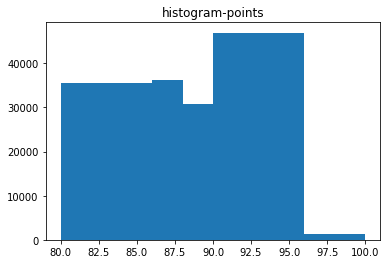

In [5]:
# 直方图
print('The histogram of points:')
hist_points, bins_points = np.histogram(points, bins=[mins_points, Q1_points, median_points, Q3_points, max_limit_points, maxs_points])
print(hist_points)
print(bins_points)
print("The number of outlier of points is:", hist_points[-1])
plt.hist(points, bins=[mins_points, Q1_points, median_points, Q3_points, max_limit_points, maxs_points])
plt.title("histogram-points")
plt.show()

The histogram of price:
[33893 31884 36123 27704  7631]
[   4.   16.   24.   40.   76. 2300.]
The number of outlier of price is: 7631


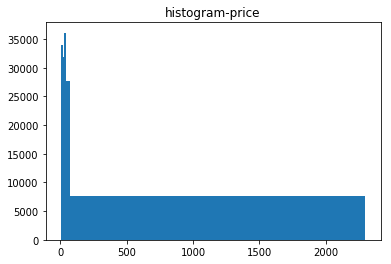

In [6]:
print('The histogram of price:')
hist_price, bins_price = np.histogram(price, bins=[mins_price, Q1_price, median_price, Q3_price, max_limit_price, maxs_price])
print(hist_price)
print(bins_price)
print("The number of outlier of price is:", hist_price[-1])
plt.hist(price, bins=[mins_price, Q1_price, median_price, Q3_price, max_limit_price, maxs_price])
plt.title("histogram-price")
plt.show()


利用盒图进行可视化

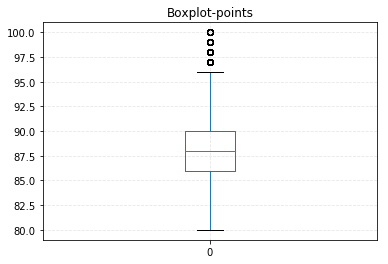

In [7]:
# 盒图
df = pd.DataFrame(points)
# print(df.describe())
df.plot.box(title="Boxplot-points")
plt.grid(linestyle="--", alpha=0.3)
plt.show()

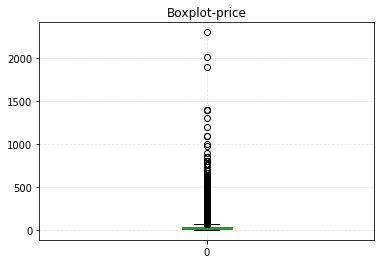

In [8]:
df = pd.DataFrame(price)
# print(df.describe())
df.plot.box(title="Boxplot-price")
plt.grid(linestyle="--", alpha=0.3)
plt.show()


数据缺失的处理

1）将缺失部分剔除，若有一项数据为空 则删除一行数据项；

In [9]:
print('Processing missing data')
points_new = list()
price_new = list()
with open(filename, 'r') as fins:
    reader = csv.reader(fins)
    rownum = 0

    # 每一行数据
    for line in reader:
        if header and rownum == 0:
            header = line
            print('header: ', header)
        else:
            # 若有一项数据为空 则删除一行数据项
            if line[0] and line[1] and line[2] and  line[3] and line[4] \
                    and line[5] and line[6] and line[7] and line[8]\
                    and line[9] and line[10]:
                points_new.append(float(line[4]))
                price_new.append(float(line[5]))

        rownum += 1
        # if rownum == 5:
        #     break

points_new = np.array(points_new)
price_new = np.array(price_new)
points_new.sort()
price_new.sort()

Processing missing data
header:  ['', 'country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'variety', 'winery']


可视化比较

In [10]:
# 可视化分析
print("========================== Visual data analysis for deleting ==========================")
mins_points = points_new[0]
maxs_points = points_new[-1]
median_points = np.median(points_new)
Q1_points = my_quantile(points_new, 0.25)
Q3_points = my_quantile(points_new, 0.75)
print("Five number summary of points: min, Q1, median, Q3, max")
print(mins_points, Q1_points, median_points, Q3_points, maxs_points)
IQR_points = Q3_points - Q1_points
print("IQR of points:", IQR_points)
min_limit_points = Q1_points - (1.5 * IQR_points)
max_limit_points = Q3_points + (1.5 * IQR_points)
print("The reasonable interval of points:", min_limit_points, max_limit_points)

mins_price = price_new[0]
maxs_price = price_new[-1]
median_price = np.median(price_new)
Q1_price = my_quantile(price_new, 0.25)
Q3_price = my_quantile(price_new, 0.75)
print("Five number summary: min, Q1, median, Q3, max")
print(mins_price, Q1_price, median_price, Q3_price, maxs_price)
IQR_price = Q3_price - Q1_price
print("IQR of price:", IQR_price)
min_limit_price = Q1_price - (1.5 * IQR_price)
max_limit_price = Q3_price + (1.5 * IQR_price)
print("The reasonable interval of price:", min_limit_price, max_limit_price)


========================== Visual data analysis for deleting ==========================
Five number summary of points: min, Q1, median, Q3, max
80.0 86.0 88.0 91.0 100.0
IQR of points: 5.0
The reasonable interval of points: 78.5 98.5
Five number summary: min, Q1, median, Q3, max
4.0 22.0 32.0 45.0 2013.0
IQR of price: 23.0
The reasonable interval of price: -12.5 79.5


直方图

The histogram of points:
[ 8444  8222 11472 11082    21]
[ 80.   86.   88.   91.   98.5 100. ]
The number of outlier of points is: 21


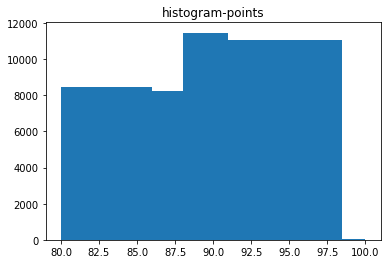

In [11]:
# 直方图
print('The histogram of points:')
hist_points, bins_points = np.histogram(points_new, bins=[mins_points, Q1_points, median_points, Q3_points, max_limit_points, maxs_points])
print(hist_points)
print(bins_points)
print("The number of outlier of points is:", hist_points[-1])
plt.hist(points_new, bins=[mins_points, Q1_points, median_points, Q3_points, max_limit_points, maxs_points])
plt.title("histogram-points")
plt.show()

The histogram of price:
[9599 9320 8976 9325 2021]
[   4.    22.    32.    45.    79.5 2013. ]
The number of outlier of price is: 2021


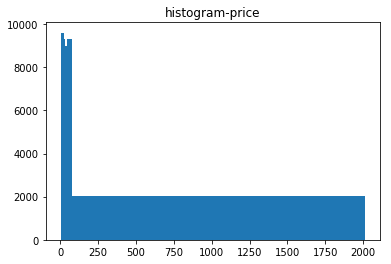

In [12]:
print('The histogram of price:')
hist_price, bins_price = np.histogram(price_new, bins=[mins_price, Q1_price, median_price, Q3_price, max_limit_price, maxs_price])
print(hist_price)
print(bins_price)
print("The number of outlier of price is:", hist_price[-1])
plt.hist(price_new, bins=[mins_price, Q1_price, median_price, Q3_price, max_limit_price, maxs_price])
plt.title("histogram-price")
plt.show()

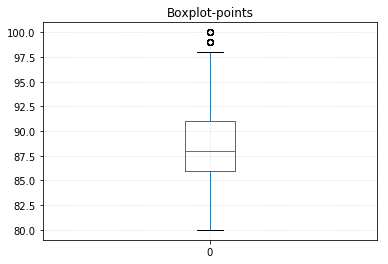

In [13]:
# 盒图
df = pd.DataFrame(points_new)
# print(df.describe())
df.plot.box(title="Boxplot-points")
plt.grid(linestyle="--", alpha=0.3)
plt.show()


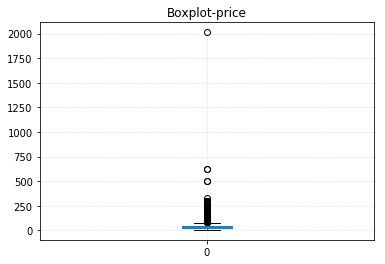

In [14]:
df = pd.DataFrame(price_new)
# print(df.describe())
df.plot.box(title="Boxplot-price")
plt.grid(linestyle="--", alpha=0.3)
plt.show()

2）用最高频率值来填补缺失值

In [15]:
most_price = stats.mode(price)[0][0]
missing_data = [most_price for i in range(missing_price)]
price_new = price.tolist()
price_new += missing_data
price_new = np.array(price_new)
price_new.sort()


可视化比较

In [16]:
print("========================== Visual data analysis for repeating ==========================")
mins_price = price_new[0]
maxs_price = price_new[-1]
median_price = np.median(price_new)
Q1_price = my_quantile(price_new, 0.25)
Q3_price = my_quantile(price_new, 0.75)
print("Five number summary: min, Q1, median, Q3, max")
print(mins_price, Q1_price, median_price, Q3_price, maxs_price)
print()
IQR_price = Q3_price - Q1_price
print("IQR of price:", IQR_price)
min_limit_price = Q1_price - (1.5 * IQR_price)
max_limit_price = Q3_price + (1.5 * IQR_price)
print("The reasonable interval of price:", min_limit_price, max_limit_price)


========================== Visual data analysis for repeating ==========================
Five number summary: min, Q1, median, Q3, max
4.0 16.0 22.0 38.0 2300.0

IQR of price: 22.0
The reasonable interval of price: -17.0 71.0


直方图和盒图分析

The histogram of price:
[33893 40071 38909 28576  9481]
[   4.   16.   22.   38.   71. 2300.]
The number of outlier of price is: 9481


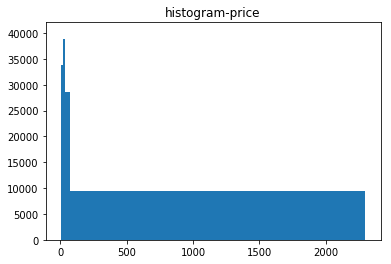

In [17]:
# 直方图
print('The histogram of price:')
hist_price, bins_price = np.histogram(price_new, bins=[mins_price, Q1_price, median_price, Q3_price, max_limit_price, maxs_price])
print(hist_price)
print(bins_price)
print("The number of outlier of price is:", hist_price[-1])
plt.hist(price_new, bins=[mins_price, Q1_price, median_price, Q3_price, max_limit_price, maxs_price])
plt.title("histogram-price")
plt.show()

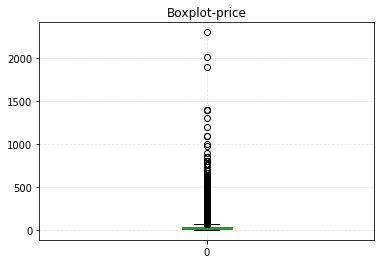

In [18]:
# 盒图
df = pd.DataFrame(price_new)
# print(df.describe())
df.plot.box(title="Boxplot-price")
plt.grid(linestyle="--", alpha=0.3)
plt.show()


3）通过属性的相关关系来填补缺失值

用随机森林方法来拟合数据，将缺失值作为目标变量；
这里只有price是缺失的，points没有缺失值，因此只对price分析；

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
df = pd.read_csv(filename, encoding="utf-8")  # df数据格式为DataFrame
def fill_price_regression(df):
    df_blank = df[['price', 'points']]

    # 假设points需要填充的列
    known_price = df_blank[df_blank.price.notnull()].as_matrix()
    unknown_price = df_blank[df_blank.price.isnull()].as_matrix()

    # y为目标points
    y = known_price[:, 0]
    # X为特征属性值
    X = known_price[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)

    # 用得到的模型进行未知price结果预测
    predicted_price = rfr.predict(unknown_price[:, 1:])
    print(predicted_price)
    # 用得到的预测结果填补原缺失数据
    df.loc[(df.price.isnull()), 'price'] = predicted_price

    return predicted_price

print("fill price with related attribute:")
predicted_price = fill_price_regression(df)

predicted_price = np.array(predicted_price).tolist()
price_new = price.tolist()
price_new += predicted_price
price_new = np.array(price_new)
price_new.sort()

fill price with related attribute:
[ 37.36204697  37.36204697  43.7592705   43.7592705   21.81451012
  27.834539    27.834539    52.3079089   43.7592705   81.95298328
  43.7592705   37.36204697  37.36204697  37.36204697  24.58683348
  24.58683348  21.81451012  32.53932878  32.53932878  52.3079089
  52.3079089   37.36204697  37.36204697  37.36204697  37.36204697
  66.41535865  43.7592705   43.7592705   37.36204697  27.834539
  27.834539    27.834539    32.53932878  24.58683348  24.58683348
  24.58683348  24.58683348  24.58683348  37.36204697  37.36204697
  37.36204697  37.36204697  66.41535865  37.36204697  20.05466641
  20.05466641  43.7592705   43.7592705   43.7592705   43.7592705
  43.7592705   43.7592705   27.834539    27.834539    27.834539
  24.58683348  24.58683348  37.36204697  37.36204697  37.36204697
  37.36204697  66.41535865  66.41535865  37.36204697  37.36204697
  20.05466641  24.58683348  24.58683348  27.834539    43.7592705
  43.7592705   43.7592705   43.7592705   43.7592

可视化比较

In [21]:
# 可视化分析
print("========================== Visual data analysis for related attribute ==========================")
mins_price = price_new[0]
maxs_price = price_new[-1]
median_price = np.median(price_new)
Q1_price = my_quantile(price_new, 0.25)
Q3_price = my_quantile(price_new, 0.75)
print("Five number summary: min, Q1, median, Q3, max")
print(mins_price, Q1_price, median_price, Q3_price, maxs_price)
print()
IQR_price = Q3_price - Q1_price
print("IQR of price:", IQR_price)
min_limit_price = Q1_price - (1.5 * IQR_price)
max_limit_price = Q3_price + (1.5 * IQR_price)
print("The reasonable interval of price:", min_limit_price, max_limit_price)


========================== Visual data analysis for related attribute ==========================
Five number summary: min, Q1, median, Q3, max
4.0 16.0 25.0 40.0 2300.0

IQR of price: 24.0
The reasonable interval of price: -20.0 76.0


直方图和盒图

The histogram of price:
[33893 40063 37450 30971  8553]
[   4.   16.   25.   40.   76. 2300.]
The number of outlier of price is: 8553


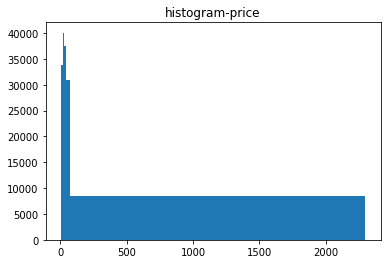

In [22]:
# 直方图
print('The histogram of price:')
hist_price, bins_price = np.histogram(price_new, bins=[mins_price, Q1_price, median_price, Q3_price, max_limit_price, maxs_price])
print(hist_price)
print(bins_price)
print("The number of outlier of price is:", hist_price[-1])
plt.hist(price_new, bins=[mins_price, Q1_price, median_price, Q3_price, max_limit_price, maxs_price])
plt.title("histogram-price")
plt.show()

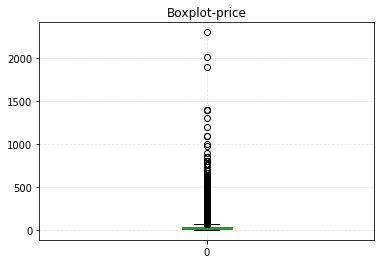

In [23]:
# 盒图
df = pd.DataFrame(price_new)
# print(df.describe())
df.plot.box(title="Boxplot-price")
plt.grid(linestyle="--", alpha=0.3)
plt.show()

4）通过数据对象之间的相似性来填补缺失值

考虑对象相关性，用插值的方法来填补数据；

In [24]:
file = '/Users/yumingfei/Documents/Document/Postgraduate/课件/数据挖掘/数据集/wine-reviews/1.csv'
data = pd.read_csv(filename, encoding="utf-8")  # df数据格式为DataFrame
for f in data:  # 插值法填充
    data[f] = data[f].interpolate()
data.to_csv(file, encoding="utf-8", header=False, index=False)

print("fill price with related object:")
price_new = list()
with open(file, 'r') as finnew:
    reader = csv.reader(finnew)
    rownum = 0

    # 每一行数据
    for line in reader:
        if header and rownum == 0:
            header = line
            print('header: ', header)
        else:
            pr = line[5]
            price_new.append(float(pr))

        rownum += 1
        # if rownum == 5:
        #     break

price_new = np.array(price_new)
price_new.sort()


fill price with related object:
header:  ['0', 'US', 'This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.', "Martha's Vineyard", '96', '235.0', 'California', 'Napa Valley', 'Napa', 'Cabernet Sauvignon', 'Heitz']


可视化比较

In [25]:
# 可视化分析
print("========================== Visual data analysis for related object ==========================")
mins_price = price_new[0]
maxs_price = price_new[-1]
median_price = np.median(price_new)
Q1_price = my_quantile(price_new, 0.25)
Q3_price = my_quantile(price_new, 0.75)
print("Five number summary: min, Q1, median, Q3, max")
print(mins_price, Q1_price, median_price, Q3_price, maxs_price)
print()
IQR_price = Q3_price - Q1_price
print("IQR of price:", IQR_price)
min_limit_price = Q1_price - (1.5 * IQR_price)
max_limit_price = Q3_price + (1.5 * IQR_price)
print("The reasonable interval of price:", min_limit_price, max_limit_price)


========================== Visual data analysis for related object ==========================
Five number summary: min, Q1, median, Q3, max
4.0 16.0 25.0 40.0 2300.0

IQR of price: 24.0
The reasonable interval of price: -20.0 76.0


直方图和盒图

The histogram of price:
[35793 38819 36704 31012  8601]
[   4.   16.   25.   40.   76. 2300.]
The number of outlier of price is: 8601


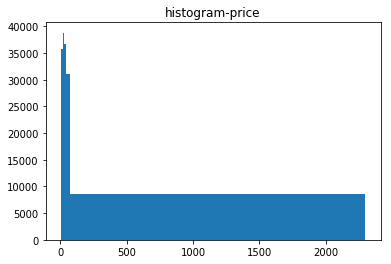

In [26]:
# 直方图
print('The histogram of price:')
hist_price, bins_price = np.histogram(price_new, bins=[mins_price, Q1_price, median_price, Q3_price, max_limit_price, maxs_price])
print(hist_price)
print(bins_price)
print("The number of outlier of price is:", hist_price[-1])
plt.hist(price_new, bins=[mins_price, Q1_price, median_price, Q3_price, max_limit_price, maxs_price])
plt.title("histogram-price")
plt.show()

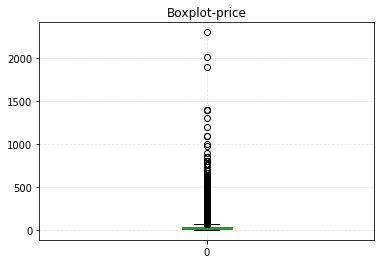

In [27]:
# 盒图
df = pd.DataFrame(price_new)
# print(df.describe())
df.plot.box(title="Boxplot-price")
plt.grid(linestyle="--", alpha=0.3)
plt.show()